In [1]:
cd "C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/edamame"

C:\Users\aloe8475\Dropbox (Sydney Uni)\Data\ASN_simulation\Python\edamame


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from edamame import *
import networkx as nx
from scipy.io import loadmat, savemat

In [4]:
plt.style.use('classic')

In [7]:
adj = loadmat('edamame/connectivity_data/AdjMat100nw.mat')['adjmat'].todense()
theAlon = nx.from_numpy_array(adj)

In [33]:
Connectivity = connectivity__(graph = theAlon)
#Total length of signal:
signal = np.ones(2000)*0.005
#which parts to pulse
signal[200:400] = 1.9
signal[1800:2000] = 1.9
#the rest is the delay
sim = defaultSimulation(Connectivity, T = 20, dt = 0.01, collapse = True, biasType = 'Custom', contactMode = 'preSet', electrodes = [19,95],offTime = 20, customSignal = signal)

Running Simulation : 100%|███████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4496.07it/s]
2020-03-05 11:35:44,658:INFO:First current path [19, 14, 22, 31, 37, 58, 77, 82, 99, 95] formed at time = 2.51 s.


In [34]:
## SAVE NEW PAIRING LIST WITH SAME PATH LENGTH

adjMat=Connectivity.adj_matrix
pathLength=6;

# Which pairings have the same length? & Different COMM values
distMat = np.zeros(adjMat.shape)
G = nx.from_numpy_array(adjMat)
for i in range(adjMat[:,0].size):
    for j in range(i+1, adjMat[:,0].size):
         distMat[i,j] = nx.shortest_path_length(G, i, j)
# distMat = distMat + distMat.T
pairingList=np.where(distMat==pathLength)
pairingList=np.array(pairingList).T
pairingList

array([[ 0, 21],
       [ 0, 35],
       [ 0, 36],
       ...,
       [89, 94],
       [90, 91],
       [91, 98]], dtype=int64)

In [35]:
#List of pairs with Path Length of X 
pairingList=pairingList[np.random.choice(len(pairingList),100,replace=False)]
savemat("C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/edamame/edamame/connectivity_data/ElecPosPathLength6.mat",dict(ElecPos=pairingList))

Max Current is 9.190903259779614e-05A
Threshold would be 7.883817427385891e-05


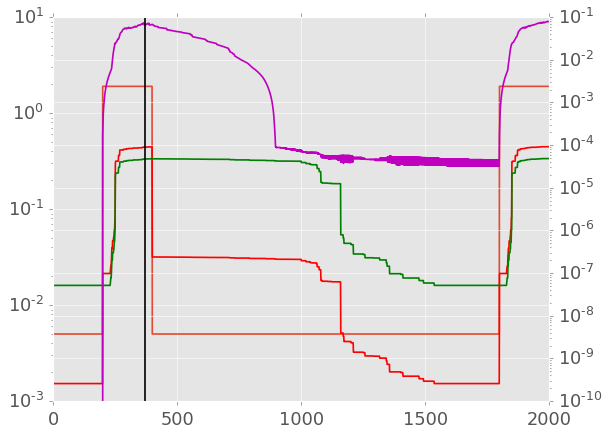

In [36]:
plt.semilogy(sim.stimulus[0].signal) #voltage
plt.twinx()
plt.semilogy(sim.electrodeCurrent[:,1], color = 'r') #current
plt.semilogy(sim.electrodeCurrent[:,1]/sim.stimulus[0].signal, color = 'g') #conductance
plt.semilogy(np.median(abs(sim.filamentState), axis = 1), color = 'm') #filament state
plt.axvline(372,color='k')

maxI=max(sim.electrodeCurrent[:,1])


print("Max Current is " + str(maxI) + "A")
print("Threshold would be " +str(max(sim.stimulus[0].signal)/(100*241)))

In [14]:
sim.filamentState[1500]

array([-6.36963138e-04,  2.55061042e-05, -3.34985351e-05,  0.00000000e+00,
        6.47263870e-04, -2.27343428e-05,  5.63005458e-04,  6.36963138e-04,
        6.07508805e-04, -4.25233703e-05, -3.14519566e-03,  2.36467666e-04,
       -8.18943134e-05, -2.55061042e-05,  4.91865774e-04, -2.19739346e-04,
        2.69374377e-04,  3.34985351e-05,  1.99094461e-04,  6.47263870e-04,
       -2.27343428e-05, -1.90739156e-05, -3.36413848e-04,  8.77896385e-03,
        2.94313831e-04, -2.20191710e-04,  0.00000000e+00, -9.36146116e-04,
        9.36146116e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.78465298e-04,  7.29205653e-04, -1.73852271e-04,
        6.72776704e-04, -7.56383165e-04,  6.75735026e-04,  8.88424207e-04,
       -6.66700657e-04, -1.03449219e-02,  3.03384112e-04,  1.36854131e-02,
       -9.36146116e-04,  0.00000000e+00,  0.00000000e+00, -4.26335760e-03,
       -7.41054036e-05,  1.11933879e-02,  0.00000000e+00,  1.33647111e-02,
        0.00000000e+00,  

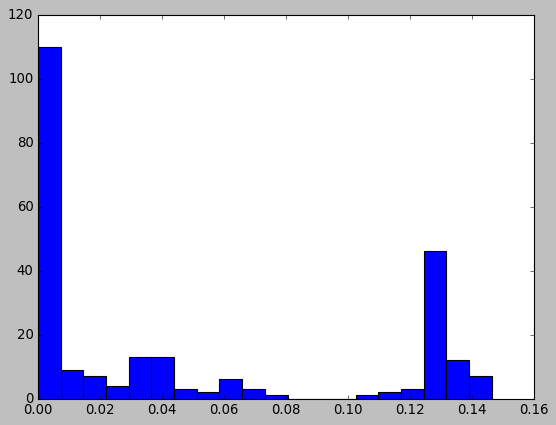

212

In [15]:
#Histograms of filament states:
plt.hist(abs(sim.filamentState[1999]),bins=20)
plt.show()
sum(abs(sim.filamentState[1999])>0)
# sum(abs(sim.filamentState[2000])==0)


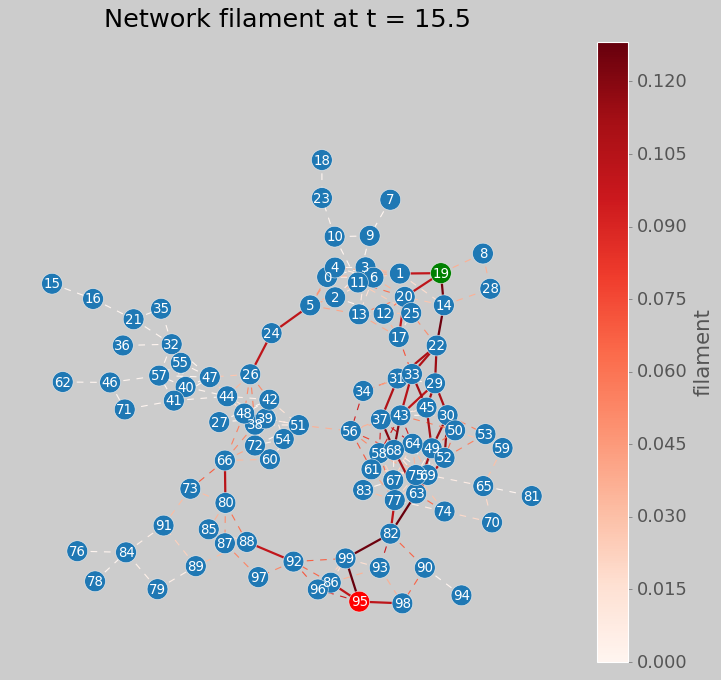

In [32]:
draw_graph(sim, time = 15.5, edge_mode= 'filament', colorbar=True)